In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x1592743588>

In [9]:
data=pd.read_csv("../MSIT_ML_CLASS/datasets/auto.csv")
data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [10]:
print(data["origin"].unique())

['US' 'Asia' 'Europe']


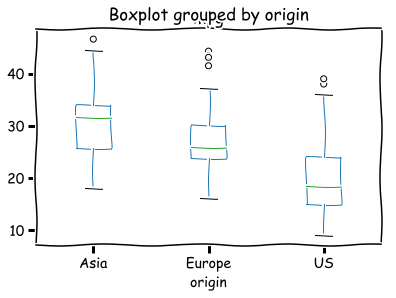

In [12]:
data.boxplot("mpg","origin")

In [27]:
df_origin=pd.get_dummies(data)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [28]:
df_origin=df_origin.drop("origin_US",axis = 1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe
0,18.0,250.0,88,3139,14.5,15.0,0,0
1,9.0,304.0,193,4732,18.5,20.0,0,0
2,36.1,91.0,60,1800,16.4,10.0,1,0
3,18.5,250.0,98,3525,19.0,15.0,0,0
4,34.3,97.0,78,2188,15.8,10.0,0,1


## linear regression after cleaning

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_origin.drop("mpg",axis=1).values
y=df_origin["mpg"].values
print(X[:10])
print(y[:10])

[[2.500e+02 8.800e+01 3.139e+03 1.450e+01 1.500e+01 0.000e+00 0.000e+00]
 [3.040e+02 1.930e+02 4.732e+03 1.850e+01 2.000e+01 0.000e+00 0.000e+00]
 [9.100e+01 6.000e+01 1.800e+03 1.640e+01 1.000e+01 1.000e+00 0.000e+00]
 [2.500e+02 9.800e+01 3.525e+03 1.900e+01 1.500e+01 0.000e+00 0.000e+00]
 [9.700e+01 7.800e+01 2.188e+03 1.580e+01 1.000e+01 0.000e+00 1.000e+00]
 [1.190e+02 1.000e+02 2.615e+03 1.480e+01 1.000e+01 1.000e+00 0.000e+00]
 [1.080e+02 7.500e+01 2.265e+03 1.520e+01 1.000e+01 1.000e+00 0.000e+00]
 [1.210e+02 7.600e+01 2.511e+03 1.800e+01 1.000e+01 0.000e+00 1.000e+00]
 [3.020e+02 1.300e+02 4.295e+03 1.490e+01 2.000e+01 0.000e+00 0.000e+00]
 [3.020e+02 1.400e+02 3.449e+03 1.050e+01 2.000e+01 0.000e+00 0.000e+00]]
[18.   9.  36.1 18.5 34.3 32.9 32.2 22.  15.  17. ]


In [44]:
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=24)
lr.fit(X_train,y_train)
lr.predict(X_test)
lr.score(X_test,y_test)

0.7626156318601363

## missing data

In [47]:
dia=pd.read_csv("../MSIT_ML_CLASS/datasets/diabetes.csv")
dia.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
my_filter=(dia["bmi"]==0)
dia[my_filter]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [52]:
dia.insulin.replace(0,np.nan,inplace=True)
dia.bmi.replace(0,np.nan,inplace=True)
dia.triceps.replace(0,np.nan,inplace=True)
dia.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [53]:
dia.isnull()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [54]:
dia.isnull().sum()

pregnancies      0
glucose          0
diastolic        0
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [55]:
dia.shape

(768, 9)

In [61]:
#option 1
#dia.dropna(inplace=True)
#print(dia.head())
#dia.shape

In [68]:

#option 2
from sklearn.preprocessing import Imputer
X=dia.iloc[:,:-1]
y=dia.iloc[:,-1]
print(X.shape)
print(y.shape)
imp=Imputer(missing_values="NaN",strategy="mean",axis=0)
imp.fit(X)
X=imp.transform(X)
new_dia=pd.DataFrame(X[:10])
print(new_dia)
np.isnan(X).sum()



(393, 8)
(393,)
     0      1     2     3      4     5      6     7
0  1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0
1  0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0
2  3.0   78.0  50.0  32.0   88.0  31.0  0.248  26.0
3  2.0  197.0  70.0  45.0  543.0  30.5  0.158  53.0
4  1.0  189.0  60.0  23.0  846.0  30.1  0.398  59.0
5  5.0  166.0  72.0  19.0  175.0  25.8  0.587  51.0
6  0.0  118.0  84.0  47.0  230.0  45.8  0.551  31.0
7  1.0  103.0  30.0  38.0   83.0  43.3  0.183  33.0
8  1.0  115.0  70.0  30.0   96.0  34.6  0.529  32.0
9  3.0  126.0  88.0  41.0  235.0  39.3  0.704  27.0


0

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps=[("imp",Imputer(missing_values="NaN",strategy="mean",axis=0)),
       ("clf",KNeighborsClassifier(n_neighbors=6))]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)        
        
pipeline=Pipeline(steps)  
pipeline.fit(X_train,y_train) 
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.7721518987341772

In [77]:
wine = pd.read_csv('../MSIT_ML_CLASS/datasets/winequality-red.csv',sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=20)
steps=[("scale",scaler),
       ("clf",knn)]
X=wine.iloc[:,:-1]
y=wine.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)        
        
pipeline=Pipeline(steps)  
pipeline.fit(X_train,y_train) 
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.5375